In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

### Import Dataset
Dataset use of a different encoding (forware slashes), therefore I use latin1 encoding

In [2]:
beer_recipe = pd.read_csv('./data/recipeData.csv', index_col='BeerID', encoding='latin1')
beer_recipe.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [3]:
print(beer_recipe.columns)

Index(['Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU',
       'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency',
       'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate', 'PrimaryTemp',
       'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')


In [4]:
print(beer_recipe.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Columns: 22 entries, Name to UserId
dtypes: float64(13), int64(2), object(7)
memory usage: 13.0+ MB
None


### Explore Missing Values

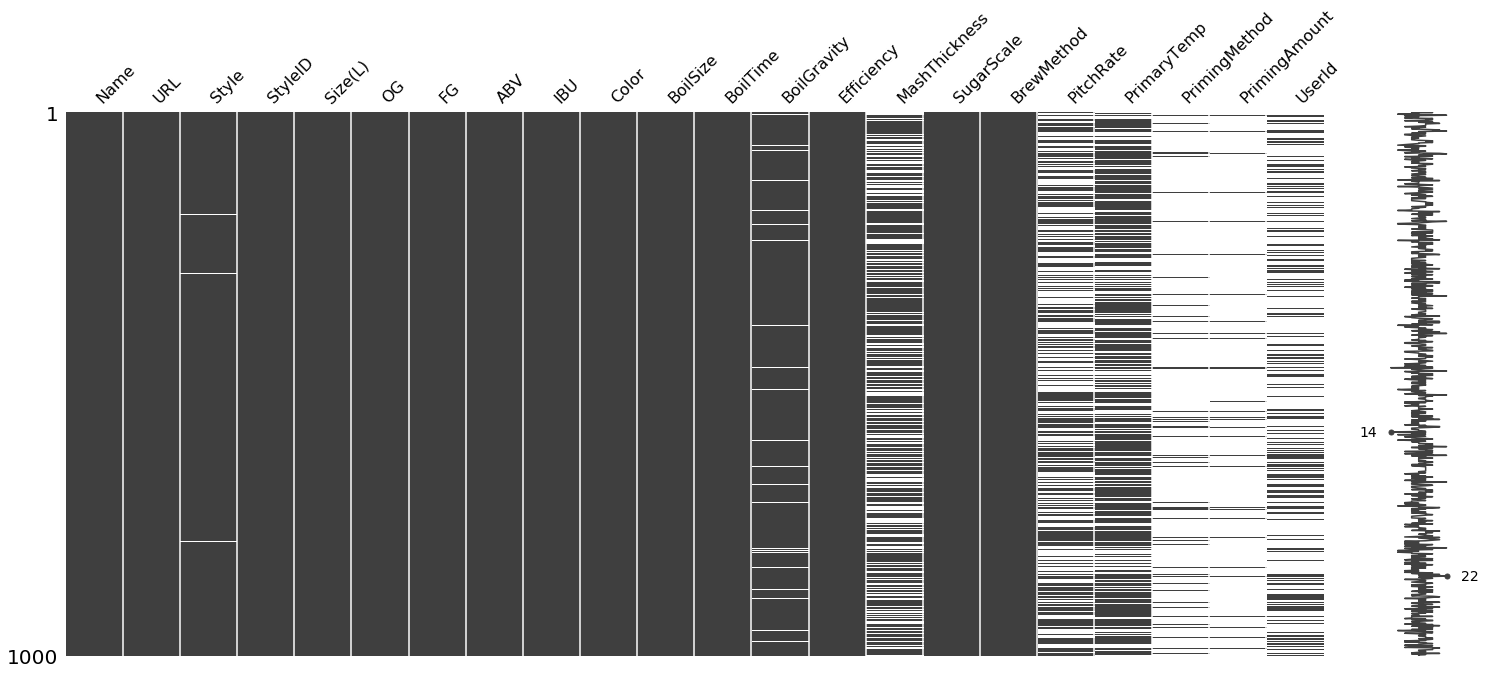

In [5]:
%matplotlib inline
msno.matrix(beer_recipe.sample(1000))

In [6]:
for column in beer_recipe.columns:
    nullCount = beer_recipe[column].isnull()
    print('{} is null {} % of the time'.format(column, round((nullCount.sum() / len(beer_recipe)) * 100), 2))

Name is null 0.0 % of the time
URL is null 0.0 % of the time
Style is null 1.0 % of the time
StyleID is null 0.0 % of the time
Size(L) is null 0.0 % of the time
OG is null 0.0 % of the time
FG is null 0.0 % of the time
ABV is null 0.0 % of the time
IBU is null 0.0 % of the time
Color is null 0.0 % of the time
BoilSize is null 0.0 % of the time
BoilTime is null 0.0 % of the time
BoilGravity is null 4.0 % of the time
Efficiency is null 0.0 % of the time
MashThickness is null 40.0 % of the time
SugarScale is null 0.0 % of the time
BrewMethod is null 0.0 % of the time
PitchRate is null 53.0 % of the time
PrimaryTemp is null 31.0 % of the time
PrimingMethod is null 91.0 % of the time
PrimingAmount is null 94.0 % of the time
UserId is null 68.0 % of the time


### Class Imbalance

#### Style
On the Brewers' Freiends website, the style is represented by two columns 
(Style name and Category).

Forexample, style name American IPA has categories of IPA, and India Pale Ale(IPA). <br>
Also, style name cream Ale has categories of Light Hybrid Beer and Standard American Beer.

But style and category is not a subset of each other.<br>
On the above category (IPA) have others style like Specialty IPA: Belgian IPA, ...

* In these dataset, they collected only the style information

In [7]:
print('There are {} different styles of beer'.format(beer_recipe.Style.nunique()))
print('There are {} different styles ID of beer'.format(beer_recipe.StyleID.nunique()))

There are 175 different styles of beer
There are 176 different styles ID of beer


* Style and StyleID are not matched, because StyleID have rows of nan at style field.

In [8]:
from math import isnan

In [9]:
style_count = {}

for style in beer_recipe.Style.unique():
    if not isinstance(style, str) and isnan(style):
        continue
    style_count[style] = len(beer_recipe[beer_recipe['Style'] == style])

In [10]:
style_count_sorted = sorted(style_count.items(), key=lambda x: (-x[1], x[0]))

#### Plot style count in descending order

Plot whole styles to analyze distribution of the class imbalance

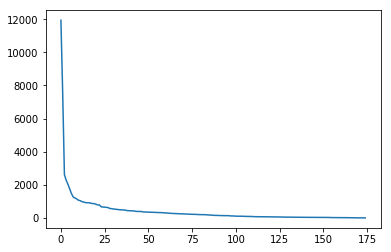

In [11]:
plt.plot([x for x in range(len(style_count))], [val[1] for val in style_count_sorted])
plt.show()

Plot top 50 number of styles to analyze distribution of the class imbalance

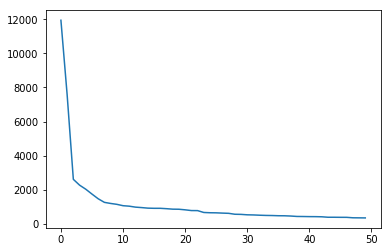

In [12]:
plt.plot([x for x in range(50)], [val[1] for val in style_count_sorted[:50]])
plt.show()

Plot top 30 number of styles to analyze distribution of the class imbalance

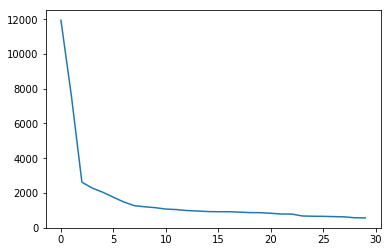

In [13]:
plt.plot([x for x in range(30)], [val[1] for val in style_count_sorted[:30]])
plt.show()

Plot top 10 number of styles to analyze distribution of the class imbalance

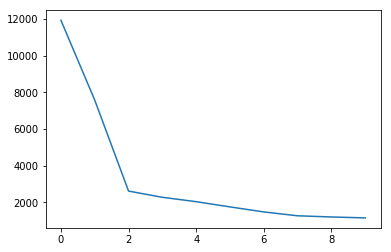

In [14]:
plt.plot([x for x in range(10)], [val[1] for val in style_count_sorted[:10]])
plt.show()